In [19]:
import main
import beacon

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import pylab as pl
from sklearn import preprocessing

In [23]:
#    num(total validators) = 111
#    p(honest validators proportion): 2/3
#    t(time when the honest validators seeking to vote) = 0.5
#    t(time when the dishonest validators who are "aiming" a smoke cloud) = 0.5
#    epsilon(bound of error) = 0.1
#    a(time latency) = 0.3
#    epsilon2 (dishonest validators' voting time adjustment)

In [24]:
def plot_win_lose(n_simulations):
    """
    parameters: the number  of games simulated
    This function calculates the number of wins and loses in n simulated games and draws the bar plot
    """
    stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]
    
    wins = 0
    for s in stats:
        if (abs(s[0] - s[1])/(s[0] + s[1])) >= 1/3:
            wins += 1
    
    labels = 'Win', 'Lose'
    sizes = [wins, len(stats)-wins]
    colors = ['lightskyblue', 'lightcoral']
    explode = (0, 0.1)
    
    # plot
    plt.pie(sizes, explode=explode, labels=labels, 
                colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
#     result = ('Win', "Lose")
#     y_pos = np.arange(len(result))
#     performance = [wins, len(stats)-wins]
    
#     plt.bar(y_pos, performance, align='center', alpha=0.5)
#     plt.text(-0.05, len(stats)/2, wins)
#     plt.text(0.95, len(stats)/2, len(stats)-wins)
#     plt.xticks(y_pos, result)
#     plt.ylabel('Result')
#     plt.title('Number of Win & Lose for n simulated games')
#     plt.show()
    
    return sizes

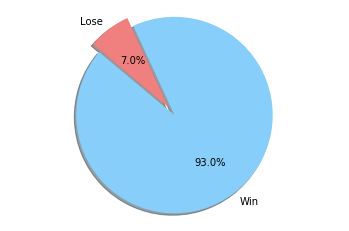

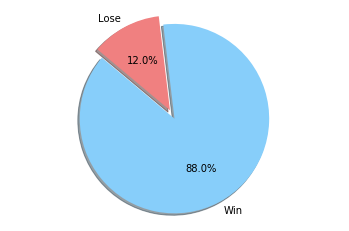

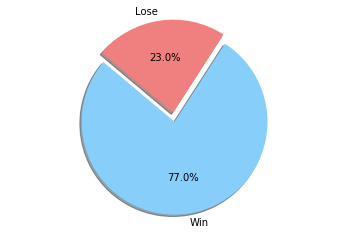

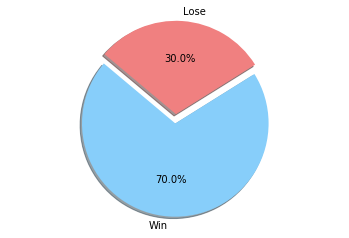

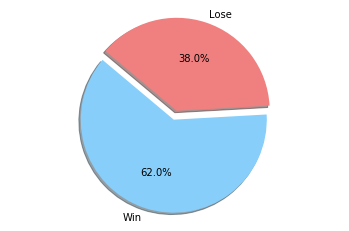

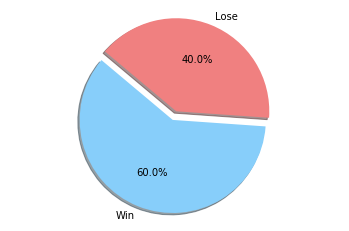

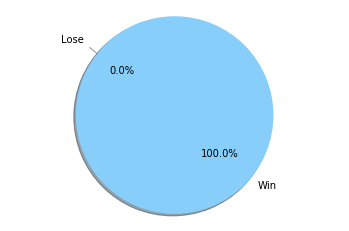

In [27]:
t_vote = 0.5
epsilon2 = [0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0]
error = 0.05
latency = 0.3

for e2 in epsilon2:
    boo = beacon.Faction.HonestFaction(74, "Honest", t_vote, error, latency)
    poo = beacon.Faction.SmokeFaction(37, "Dishonest", t_vote, error, e2)
    plot_win_lose(100)